x =/n [[0.1127388 ]
 [0.12131038]
 [0.36135283]
 [0.42621635]
 [0.5227758 ]
 [0.70964656]
 [0.77355779]
 [0.86011972]
 [1.26229537]
 [1.58733367]
 [1.89257011]
 [2.1570474 ]
 [2.18226463]
 [2.30064911]
 [2.48797164]
 [2.5419288 ]
 [2.62219172]
 [2.62552327]
 [2.73690199]
 [2.76887617]
 [3.13108993]
 [3.17336952]
 [3.2692991 ]
 [3.29288102]
 [3.40826737]
 [3.41060369]
 [3.61658026]
 [3.67257434]
 [3.70160398]
 [3.70581298]
 [3.83952613]
 [3.87536468]
 [4.00060029]
 [4.02382722]
 [4.09092179]
 [4.18578718]
 [4.2911362 ]
 [4.64540214]
 [4.66894051]
 [4.68317506]
 [4.75035023]
 [4.79495139]
 [4.99571907]
 [5.22007289]
 [5.350638  ]
 [5.55357983]
 [5.66248847]
 [5.6680135 ]
 [5.78197656]
 [5.87171005]]
<class 'numpy.ndarray'>
y =/n [ 0.05437325  0.43710367  0.65611482  0.78304981  0.87329469  1.38088042
  1.23598022  1.49456731  1.81603293  2.03841677  1.84627139  1.54797796
  1.63479377  1.53337832  1.22278185  1.15897721  0.92928812  0.95065638
  0.72022281  0.69233817 -0.06030957 -0.2361

<ipython-input-1-674075acf074>:49: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


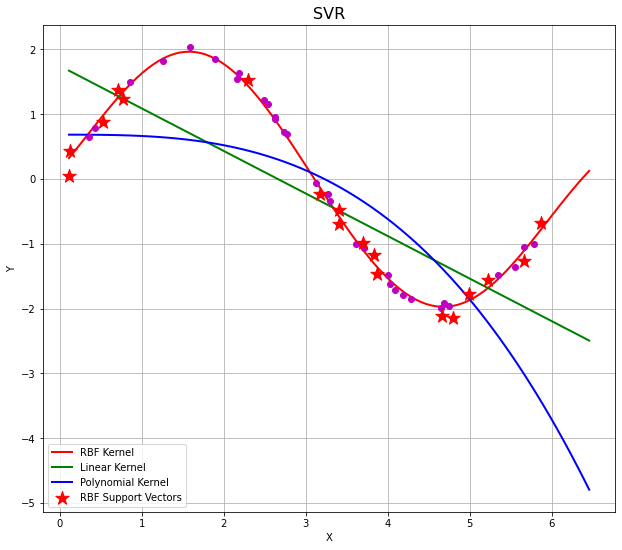

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt


if __name__ == "__main__":
    # 构造数据
    N = 50
    np.random.seed(0)
    # 排序
    x = np.sort(np.random.uniform(0, 6, N), axis=0)
    y = 2*np.sin(x) + 0.1*np.random.randn(N)
    x = x.reshape(-1, 1)
    print('x =/n', x)
    print(type(x))
    print('y =/n', y)

    # 高斯核函数
    print('SVR - RBF')
    svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
    svr_rbf.fit(x, y)
    # 线性核函数
    print('SVR - Linear')
    svr_linear = svm.SVR(kernel='linear', C=100)
    svr_linear.fit(x, y)
    # 多项式核函数
    print('SVR - Polynomial')
    svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
    svr_poly.fit(x, y)
    print('Fit OK.')

    # 思考：系数1.1改成1.5
    x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
    y_rbf = svr_rbf.predict(x_test)
    y_linear = svr_linear.predict(x_test)
    y_poly = svr_poly.predict(x_test)

    plt.figure(figsize=(9, 8), facecolor='w')
    plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
    plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
    plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
    plt.plot(x, y, 'mo', markersize=6)
    plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=200, c='r', marker='*', label='RBF Support Vectors', zorder=10)
    plt.legend(loc='lower left')
    plt.title('SVR', fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.tight_layout(2)
    plt.show()

In [36]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("COGgeneration201307.csv")

In [47]:
df = df[1:1441]

In [48]:
df

,time,production1,production2,pressure1,pressure2,level1,level2,temperature1,temperature2
1,2013/7/1 00:01,72622.64063,152797.0781,959.750732,997.048462,21.323746,26.443338,29.825211,31.655361
2,2013/7/1 00:02,72196.45313,147936.0156,963.743591,999.102722,21.322697,25.961321,29.834692,31.645418
3,2013/7/1 00:03,74899.75781,150232.5469,960.671875,998.053528,21.321648,25.479301,29.844172,31.635477
4,2013/7/1 00:04,74754.74219,153747.7344,950.555908,993.322998,21.320599,24.936977,29.853653,31.625536
5,2013/7/1 00:05,71094.89063,154132.3125,961.110168,994.051453,21.319550,24.370209,29.863134,31.615595
...,...,...,...,...,...,...,...,...,...
1436,2013/7/1 23:56,67847.71875,122980.7188,1018.856628,1031.842529,26.418678,76.139130,30.599022,31.267815
1437,2013/7/1 23:57,67142.09375,124617.1484,1008.969421,1030.062622,26.417469,76.617569,30.594732,31.264910
1438,2013/7/1 23:58,65391.33984,132662.7813,1005.025024,1027.589600,26.416260,76.940826,30.590445,31.262003
1439,2013/7/1 23:59,64286.41797,131439.0156,1004.363831,1030.029053,26.415049,77.086426,30.586157,31.259098


SVR - RBF
SVR - Linear
SVR - Polynomial
Fit OK.


<ipython-input-49-90489f17de0a>:49: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


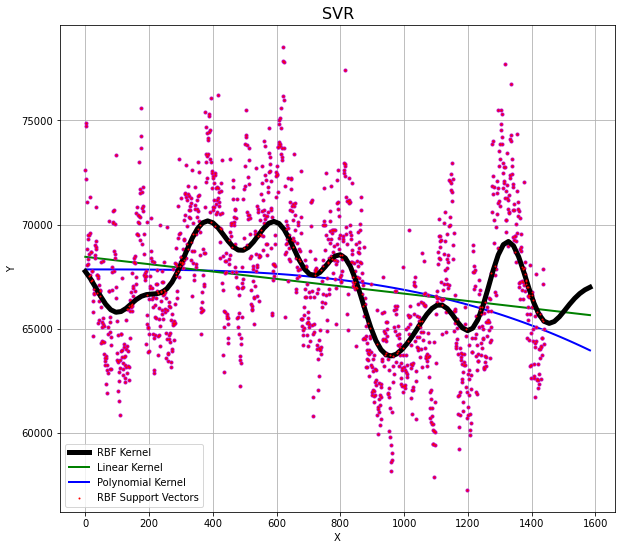

In [49]:
if __name__ == "__main__":
    # 构造数据
    #N = 50
    #np.random.seed(0)
    # 排序
    x = []
    for i in range(0, len(df), 1):
        x.append(i)
    x = np.array(x)
    #x = df['temperature1']
    #x = np.array(x)
    y = df['production1']
    y = np.array(y)
    x = x.reshape(-1, 1)
    #print('x =/n', x)
    #print('y =/n', y)

    # 高斯核函数
    print('SVR - RBF')
    svr_rbf = svm.SVR(kernel='rbf', gamma=0.0001, C=100)
    svr_rbf.fit(x, y)
    # 线性核函数
    print('SVR - Linear')
    svr_linear = svm.SVR(kernel='linear', C=100)
    svr_linear.fit(x, y)
    # 多项式核函数
    print('SVR - Polynomial')
    svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
    svr_poly.fit(x, y)
    print('Fit OK.')

    # 思考：系数1.1改成1.5
    x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
    y_rbf = svr_rbf.predict(x_test)
    y_linear = svr_linear.predict(x_test)
    y_poly = svr_poly.predict(x_test)

    plt.figure(figsize=(9, 8), facecolor='w')
    plt.plot(x_test, y_rbf, 'k-', linewidth=5, label='RBF Kernel', zorder = 3)
    plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel', zorder = 2)
    plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel', zorder = 1)
    plt.plot(x, y, 'mo', markersize=3)
    plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=1, c='r', label='RBF Support Vectors', zorder=10)
    plt.legend(loc='lower left')
    plt.title('SVR', fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.tight_layout(2)
    plt.show()